## Visualization

This notebook reads in the data from the different dataframes, and plots the target and predictor variables as choropleths using geopandas. Then, the residuals are plotted using Folium to make an interactive map.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib 
import numpy as np
import pickle

## Choropleth maps of target and predictors

Geojson outlines of all counties in the United States downloaded from [this website](https://github.com/python-visualization/folium/blob/master/tests/us-counties.json)

In [2]:
counties = gpd.read_file('us-counties.json')
counties.head(10)

,id,name,geometry
0,1001,Autauga,"POLYGON ((-86.41178600000001 32.706342, -86.41..."
1,1003,Baldwin,"POLYGON ((-87.76459 31.298768, -87.616713 31.2..."
2,1005,Barbour,"POLYGON ((-85.354736 32.147694, -85.053504 32...."
3,1007,Bibb,"POLYGON ((-87.063542 33.248559, -87.025203 33...."
4,1009,Blount,"POLYGON ((-86.488463 34.261793, -86.455601 34...."
5,1011,Bullock,"POLYGON ((-85.91886100000001 32.273663, -85.43..."
6,1013,Butler,"POLYGON ((-86.477509 31.966955, -86.450124 31...."
7,1015,Calhoun,"POLYGON ((-85.738122 33.966038, -85.5299980000..."
8,1017,Chambers,"POLYGON ((-85.40402899999999 33.106158, -85.23..."
9,1019,Cherokee,"POLYGON ((-85.51356699999999 34.524686, -85.46..."


In [3]:
# Cast the IDs as strings, and then also append a 0 before every ID that is only 4 characters long.
# Figure out how many rows have 'ids' that are 4 characters long using list comprehensions; there are 313.
counties['id'] = counties['id'].astype('str')
temp = [row for row in counties['id'] if len(row) < 5]
print(len(temp))

313


In [4]:
counties['id'].iloc[0:313] = '0' + counties['id'].iloc[0:313]
state_codes = [row[0:2] for row in counties['id']]
counties['state_codes'] = state_codes

In [5]:
counties.rename(index=str, columns={'id':'INCITS'}, inplace=True);

In [6]:
alabama = counties[counties['state_codes'] == '01']

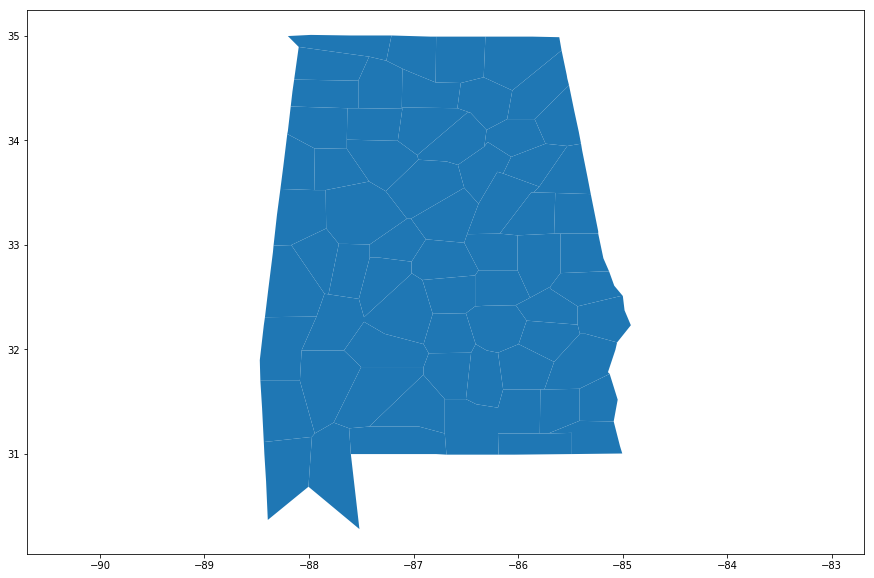

In [7]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax = alabama.plot(ax=ax)
lims = plt.axis('equal')
plt.show()

In [8]:
continental = counties[(counties['state_codes'] != '02') & (counties['state_codes'] != '15')]

In [9]:
continental.state_codes.unique()

array(['01', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50',
       '51', '53', '54', '55', '56'], dtype=object)

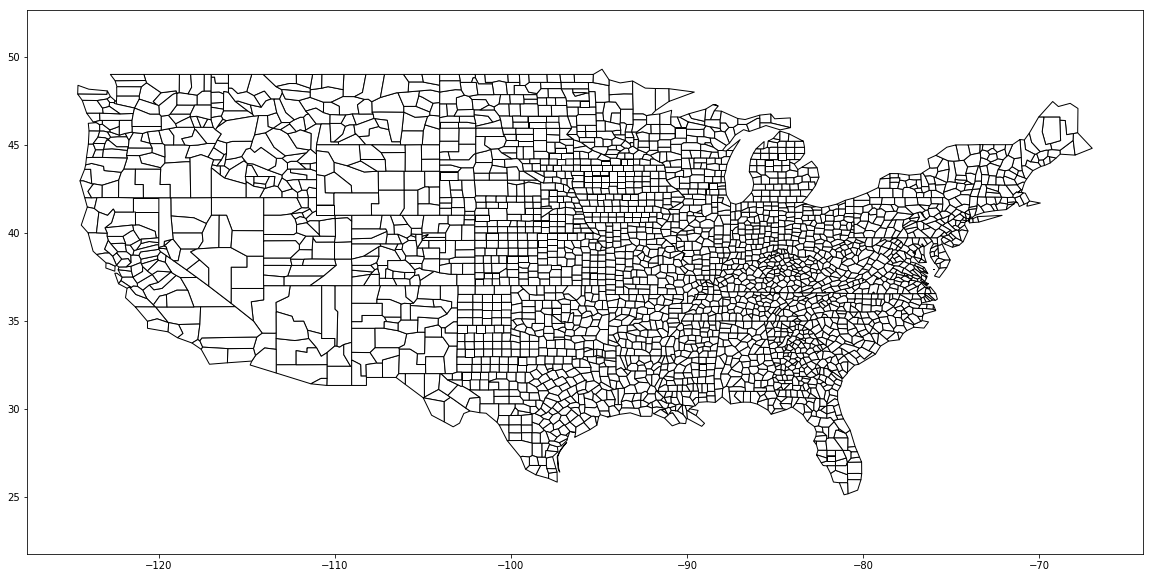

In [10]:
f, ax = plt.subplots(1, figsize=(20, 10))
ax = continental.plot(ax=ax, color='white', edgecolor='black')
lims = plt.axis('equal')
plt.show()

In [11]:
continental.crs

{'init': 'epsg:4326'}

## Target variable

Let's load the target variable, the crude rate of overdose deaths per county.

In [12]:
with open('clean_od_mort_df.pkl', 'rb') as picklefile:
    clean_od_mort_df = pickle.load(picklefile)

In [13]:
clean_od_mort_df.head()

,county_name,overdose_deaths,population,crude_rate,age_adj_rate,INCITS
1,Baldwin County AL (01003),34,208563,16.3,15.7,01003
4,Blount County AL (01009),15,57704,25.9947,Unreliable,01009
7,Calhoun County AL (01015),16,114611,13.9603,Unreliable,01015
21,Cullman County AL (01043),20,82471,24.3,26.4,01043
24,DeKalb County AL (01049),19,70900,26.7983,Unreliable,01049


In [14]:
target_variable_df = clean_od_mort_df[['INCITS', 'crude_rate']]

In [15]:
target_variable_df.head()

,INCITS,crude_rate
1,01003,16.3
4,01009,25.9947
7,01015,13.9603
21,01043,24.3
24,01049,26.7983


In [16]:
counties.head()

,INCITS,name,geometry,state_codes
0,01001,Autauga,"POLYGON ((-86.41178600000001 32.706342, -86.41...",01
1,01003,Baldwin,"POLYGON ((-87.76459 31.298768, -87.616713 31.2...",01
2,01005,Barbour,"POLYGON ((-85.354736 32.147694, -85.053504 32....",01
3,01007,Bibb,"POLYGON ((-87.063542 33.248559, -87.025203 33....",01
4,01009,Blount,"POLYGON ((-86.488463 34.261793, -86.455601 34....",01


In [17]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [18]:
# the geodataframe has to be on the left when you merge dataframes, otherwise the resulting dataframe is
# not a geodataframe and has to be re-converted to a geodataframe.

target_choropleth = pd.merge(counties, target_variable_df, on='INCITS')

In [19]:
target_choropleth.head()

,INCITS,name,geometry,state_codes,crude_rate
0,01003,Baldwin,"POLYGON ((-87.76459 31.298768, -87.616713 31.2...",01,16.3
1,01009,Blount,"POLYGON ((-86.488463 34.261793, -86.455601 34....",01,25.9947
2,01015,Calhoun,"POLYGON ((-85.738122 33.966038, -85.5299980000...",01,13.9603
3,01043,Cullman,"POLYGON ((-86.986864 34.311085, -86.581571 34....",01,24.3
4,01049,DeKalb,"POLYGON ((-85.584768 34.858779, -85.5354750000...",01,26.7983


In [20]:
target_choropleth['crude_rate'] = target_choropleth['crude_rate'].astype('float')

In [22]:
target_choropleth.crs

{'init': 'epsg:4326'}

In [23]:
target_choropleth.to_crs(counties.crs);

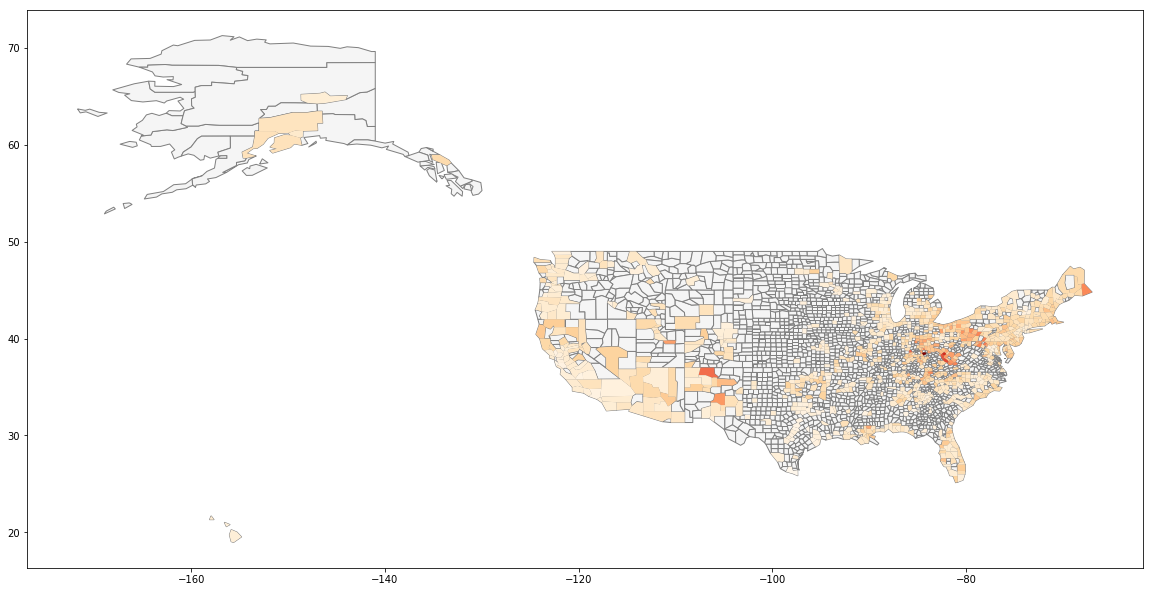

In [24]:
plt.rcParams['figure.figsize'] = [20, 20]

base = counties.plot(color='whitesmoke', edgecolor='gray')
target_choropleth.plot(ax=base, column='crude_rate', cmap='OrRd')

In [25]:
log_crude_rate = target_variable_df.copy()

In [26]:
log_crude_rate['crude_rate'] = log_crude_rate['crude_rate'].astype('float')
log_crude_rate['crude_rate'] = log_crude_rate['crude_rate'].apply(np.log)

In [27]:
log_crude_rate = log_crude_rate.rename(columns={'crude_rate':'log_crude_rate'});

In [28]:
target_choropleth2 = pd.merge(counties, log_crude_rate, on='INCITS')

In [29]:
continental_log_crude_rate = target_choropleth2[(target_choropleth2['state_codes'] != '02')\
                                                & (target_choropleth2['state_codes'] != '15')]

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
continental_log_crude_rate.plot(ax=base, column='log_crude_rate', cmap='OrRd', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('target_variable_map.png', dpi=150, transparent=True)

## Census variable maps

In [46]:
with open('census_master_df.pkl', 'rb') as picklefile:
    census_master_df = pickle.load(picklefile)

In [47]:
census_master_df.head()

,INCITS,median_age,percent_white,hs_percent,median_hh_income,percent_unemployed,percent_poverty
0,01001,37.8,76.9,87.6,53099,3.4,9.4
1,01003,42.3,86.4,90.0,51365,3.7,9.3
2,01005,38.7,46.7,73.8,33956,6.2,20.0
3,01007,40.2,77.0,80.7,39776,3.5,11.7
4,01009,40.8,95.4,80.0,46212,3.0,12.2


In [48]:
census_master_df.iloc[:, 1:] = census_master_df.iloc[:, 1:].apply(pd.to_numeric)

In [49]:
census_map = pd.merge(continental, census_master_df, on='INCITS')

In [50]:
census_map.head()

,INCITS,name,geometry,state_codes,median_age,percent_white,hs_percent,median_hh_income,percent_unemployed,percent_poverty
0,01001,Autauga,"POLYGON ((-86.41178600000001 32.706342, -86.41...",01,37.8,76.9,87.6,53099,3.4,9.4
1,01003,Baldwin,"POLYGON ((-87.76459 31.298768, -87.616713 31.2...",01,42.3,86.4,90,51365,3.7,9.3
2,01005,Barbour,"POLYGON ((-85.354736 32.147694, -85.053504 32....",01,38.7,46.7,73.8,33956,6.2,20
3,01007,Bibb,"POLYGON ((-87.063542 33.248559, -87.025203 33....",01,40.2,77,80.7,39776,3.5,11.7
4,01009,Blount,"POLYGON ((-86.488463 34.261793, -86.455601 34....",01,40.8,95.4,80,46212,3,12.2


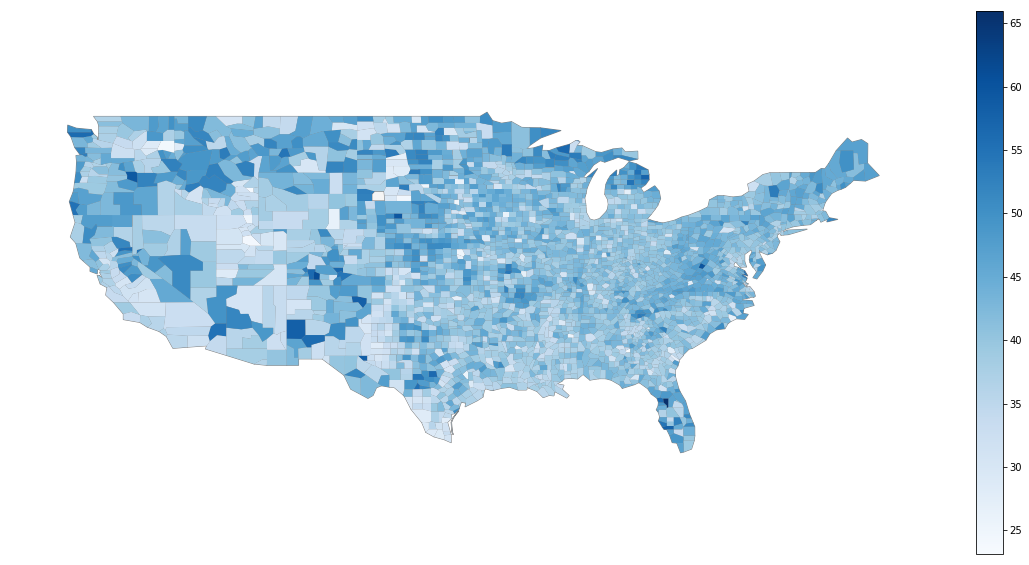

In [51]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
census_map.plot(ax=base, column='median_age', cmap='Blues', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('median_age_map.png', dpi=150, transparent=True)

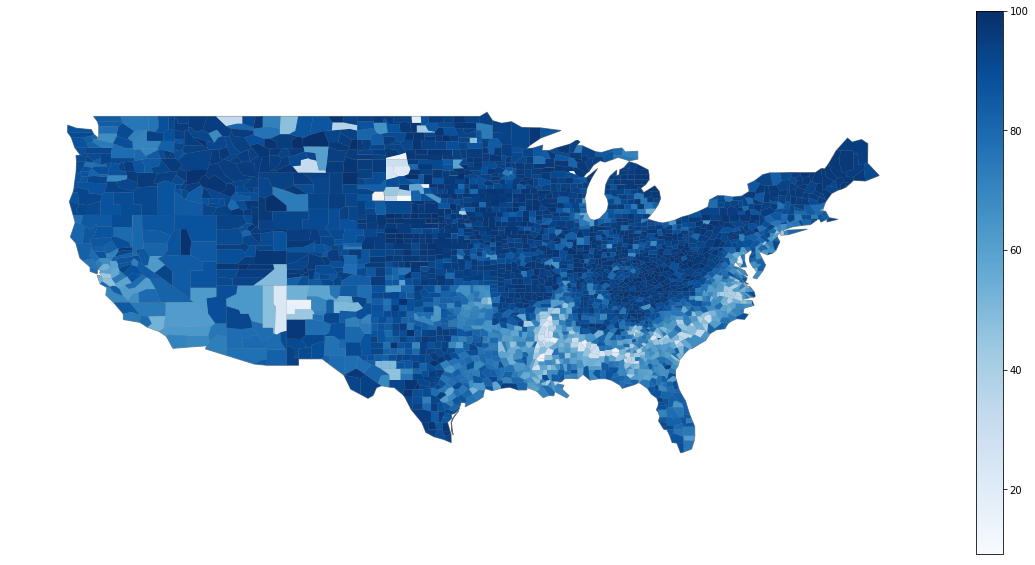

In [52]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
census_map.plot(ax=base, column='percent_white', cmap='Blues', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('percent_white_map.png', dpi=150, transparent=True)

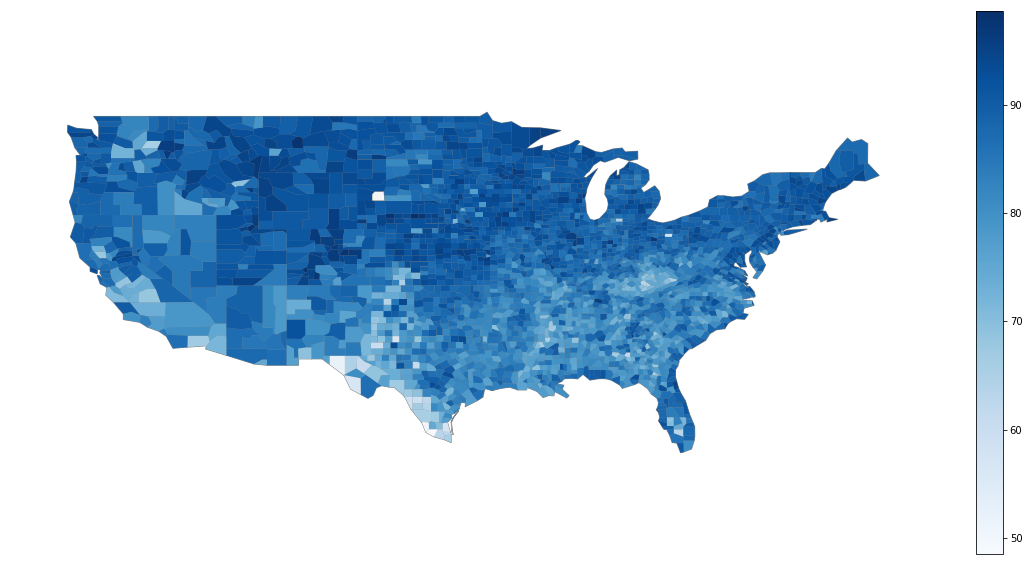

In [53]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
census_map.plot(ax=base, column='hs_percent', cmap='Blues', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('hs_percent_map.png', dpi=150, transparent=True)

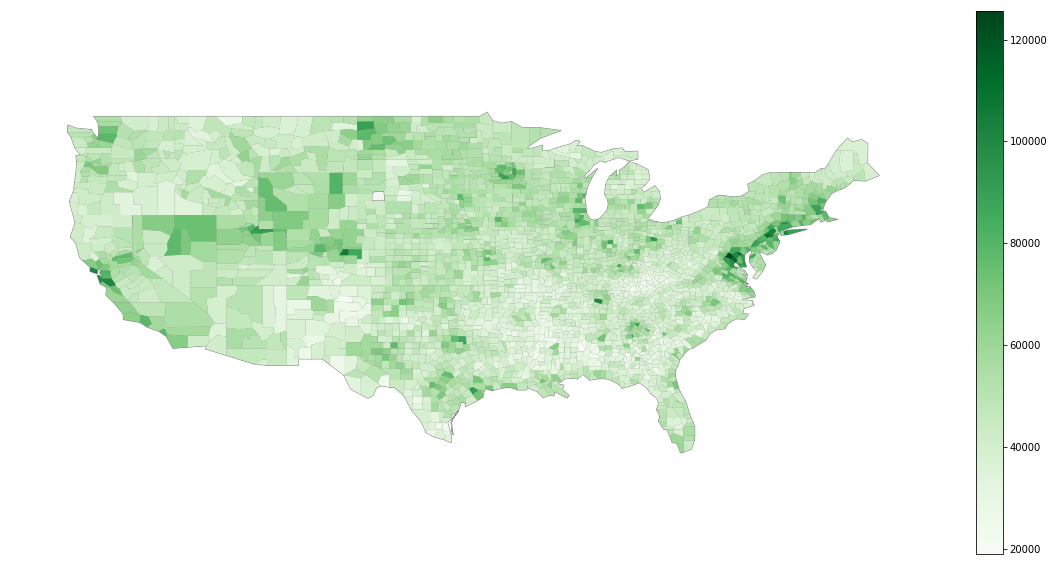

In [54]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
census_map.plot(ax=base, column='median_hh_income', cmap='Greens', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('median_hh_income_map.png', dpi=150, transparent=True)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
census_map.plot(ax=base, column='percent_unemployed', cmap='Greens', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('percent_unemployed_map.png', dpi=150, transparent=True)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
census_map.plot(ax=base, column='percent_poverty', cmap='Greens', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('percent_poverty_map.png', dpi=150, transparent=True)

## Prescribing map

In [ ]:
with open('opioid_rx_df.pkl', 'rb') as picklefile:
    opioid_rx_df = pickle.load(picklefile)

In [ ]:
opioid_rx_df.head()

In [ ]:
opioid_rx_df.iloc[:, 2:] = opioid_rx_df.iloc[:, 2:].apply(pd.to_numeric)
opioid_map = pd.merge(continental, opioid_rx_df, on='INCITS')

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental.plot(color='whitesmoke', edgecolor='gray')
opioid_map.plot(ax=base, column='opioid_rx_rate_2014', cmap='Purples', legend=True)

plt.axis('off')

fig = plt.gcf()
fig.savefig('opioid_rx_2014_map.png', dpi=150, transparent=True)

## PDMP age and census regions

In [ ]:
states = gpd.read_file('states.json')

In [ ]:
states.head()

In [ ]:
clean_states = states[['STATE', 'NAME', 'geometry']]
continental_states = clean_states[(clean_states['STATE'] != '02') & (clean_states['STATE'] != '15') & (clean_states['STATE'] != '72')]

In [ ]:
with open('pmp_age.pkl', 'rb') as picklefile:
    pmp_age_df = pickle.load(picklefile)

In [ ]:
pmp_age_df.head()

In [ ]:
pmp_age_df = pmp_age_df.rename(index=str, columns={'index': 'NAME'})

In [ ]:
pmp_map = pd.merge(continental_states, pmp_age_df, on='NAME')

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

base = continental_states.plot(color='whitesmoke', edgecolor='gray')
pmp_map.plot(ax=base, column='pmp_age_in_2016', cmap='Purples')

plt.axis('off')

fig = plt.gcf()
fig.savefig('pmp_map.png', dpi=150, transparent=True)

In [ ]:
with open('master_df.pkl', 'rb') as picklefile:
    master_df = pickle.load(picklefile)

In [ ]:
master_df.head()

In [ ]:
plt.boxplot(master_df['median_age'])
plt.show()

In [ ]:
master_df.describe()

## Folium

In [55]:
import folium as folium
import pandas as pd

In [58]:
counties_spatial = counties[['INCITS', 'geometry']]
counties_geojson_str = counties_spatial.to_json()

In [66]:
relevant_counties_spatial = target_choropleth2[['INCITS', 'geometry']]
relevant_counties_geojson_str = relevant_counties_spatial.to_json()

In [59]:
counties_spatial_small = counties_spatial.iloc[0:10]
counties_geojson_str_small = counties_spatial_small.to_json()

In [60]:
log_crude_rate.head()

,INCITS,log_crude_rate
1,01003,2.791165
4,01009,3.257894
7,01015,2.636215
21,01043,3.190476
24,01049,3.288339


In [61]:
log_crude_rate['log_crude_rate'].max()

4.937347498326424

In [84]:
threshold_scale = np.linspace(-1.2, 1.5, 
                              6, dtype=float).tolist()

threshold_scale

[-1.2,
 -0.6599999999999999,
 -0.11999999999999988,
 0.42000000000000015,
 0.9600000000000002,
 1.5]

In [86]:
map = folium.Map(location=[40, -98], zoom_start=4)

map.choropleth(geo_data=relevant_counties_geojson_str,
              data=resid_choropleth,
              columns=['INCITS', 'y_resid'],
              fill_color='PiYG',
              key_on='feature.properties.INCITS',
              threshold_scale=threshold_scale)

map

In [88]:
map.save('resid_map.html')